In [184]:
# imports
import numpy as np # generic math functions
import numpy.linalg as la
#import scipy.linalg as linalg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

%load_ext autoreload
%autoreload 2
import qpdcsim as q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
# hyperparameters
m = 1.0 # `mass' parameter

In [186]:
"""
Simulation 1
"""
# setup the simulation
d=2 # physical Hilbert space dimension (2 for spin-1/2)
N=3# level of rational approximation, frequencies = [1, F_{N+1}/F_N]
L=4 # horizontal length of truncated strip of frequency lattice
sim = q.FiboSim(d,N,L) # setup simulator object
#sim.plot_freq_lattice() # plot frequency lattice

# define the drive Hamiltonian interactions
x_drive = q.Interaction({'type':'cos',
                        'operator':q.PAULI['X'],
                        'parameters': {'freq':0,
                                      'amplitude':1,
                                      'phase':-np.pi/2}
                       })
                       
y_drive = q.Interaction({'type':'cos',
                        'operator':q.PAULI['Y'],
                        'parameters': {'freq':1,
                                      'amplitude':1,
                                      'phase':-np.pi/2}
                       })
z_drive_a = q.Interaction({'type':'constant',
                          'operator':m*q.PAULI['Z']
                          })

z_drive_b = q.Interaction({'type':'cos',
                        'operator':q.PAULI['Z'],
                        'parameters': {'freq':0,
                                      'amplitude':-1,
                                      'phase':0}
                       })
z_drive_c = q.Interaction({'type':'cos',
                        'operator':q.PAULI['Z'],
                        'parameters': {'freq':1,
                                      'amplitude':-1,
                                      'phase':0}
                       })

# add the interactions to the simulator object (as list)
sim.interactions = [x_drive,y_drive,z_drive_a,z_drive_b,z_drive_c]

# sweep over "flux" through compactified direction on Frequency lattice
# and compute quasi-energy spectrum
N_sweep = 21 # number of points to sweep
fluxes = np.linspace(0,2*np.pi,N_sweep) # fluxes to sweep over

Es =np.zeros([N_sweep,sim.Hsize]) # quasi-energy spectrum
for j in range(N_sweep):    
    Es[j,:],psi=sim.compute_spectrum(flux=fluxes[j])

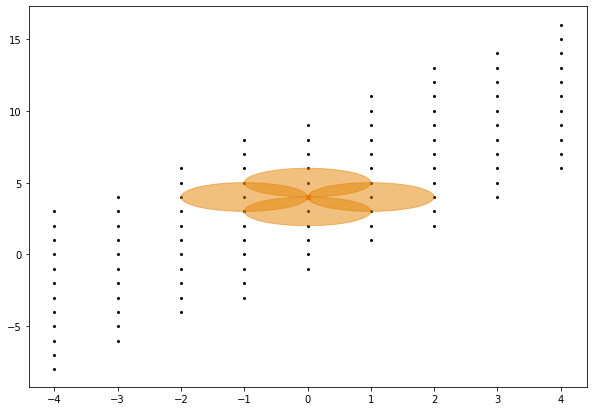

In [187]:
# visualize interactions
s1 = np.floor(sim.size/2) # pick a site in the middle of the strip
sim.plot_interactions(s1)

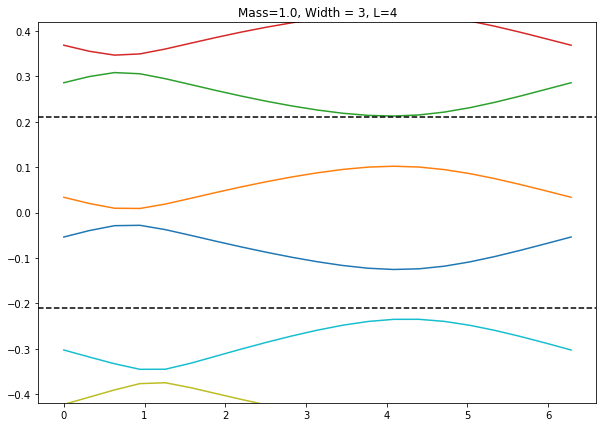

In [195]:
# simulate the quasi-energy spectrum
plt.figure()
ylim = np.pi/(q.Fibonacci(N+1)*q.Fibonacci(N))  
plt.plot(fluxes,Es)
plt.ylim(-2*ylim,2*ylim)
plt.title('Mass=%s'%m + ', Width = %s' % q.Fibonacci(N) + ', L=%s'%L)
plt.axhline(ylim,linestyle='--',color='k')
plt.axhline(-ylim,linestyle='--',color='k')
plt.show()